In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Preprocessed_data.csv")

In [4]:
data.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,3.232259e+09,3821.0,180881160.0,3128.0,6.0,341.0,1.0,1.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,AMAZON
1,3.232259e+09,4836.0,180881160.0,3128.0,6.0,341.0,1.0,1.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,AMAZON
2,3.232259e+09,3773.0,180881160.0,3128.0,6.0,327.0,1.0,1.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,AMAZON
3,3.232259e+09,1523.0,180881159.0,3128.0,6.0,313.0,1.0,1.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,AMAZON
4,3.232248e+09,3053.0,180881159.0,3128.0,6.0,766.0,1.0,2.0,6.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,AMAZON


In [5]:
x=data.iloc[:,0:83]
y=data.iloc[:,-1]

In [6]:
model = RandomForestClassifier()

In [7]:
%%time
model.fit(x,y)

Wall time: 13min 55s


RandomForestClassifier()

In [8]:
model.feature_importances_

array([3.70678750e-02, 3.71858759e-02, 5.66927566e-02, 3.20889411e-02,
       9.73211033e-03, 1.84644899e-02, 6.76804185e-03, 6.16534662e-03,
       1.16335782e-02, 6.82099854e-03, 2.13093799e-02, 6.26430433e-03,
       1.34960331e-02, 1.44981358e-02, 8.77181296e-03, 6.40008572e-03,
       8.63961033e-03, 6.48171301e-03, 1.22875743e-02, 1.28705038e-02,
       1.32177522e-02, 1.05615235e-02, 1.93802728e-02, 8.43501969e-03,
       1.19060130e-02, 8.66665473e-03, 8.90276303e-03, 1.18262042e-02,
       6.24133201e-03, 1.12189846e-02, 7.09109021e-03, 8.13913249e-03,
       1.08016258e-02, 3.28758804e-03, 3.46695326e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.02103592e-02, 6.28345029e-03,
       1.28978883e-02, 9.89569878e-03, 6.94121678e-03, 1.08898865e-02,
       9.05733915e-03, 8.24397554e-03, 9.17217083e-03, 4.00316307e-04,
       3.26479191e-03, 2.91717588e-05, 3.12065166e-03, 3.37373192e-03,
       3.13790048e-03, 0.00000000e+00, 2.79540861e-05, 4.81117195e-03,
      

In [9]:
featureimpt=pd.DataFrame(model.feature_importances_,index=x.columns,columns=['Importance'])
featureimpt=featureimpt.sort_values(by='Importance',ascending=False)
featureimpt

,Importance
L7Protocol,0.237860
Destination.IP,0.056693
Init_Win_bytes_forward,0.038228
Source.Port,0.037186
Source.IP,0.037068
...,...
Fwd.Avg.Bytes.Bulk,0.000000
Bwd.PSH.Flags,0.000000
Fwd.URG.Flags,0.000000
CWE.Flag.Count,0.000000


<AxesSubplot:>

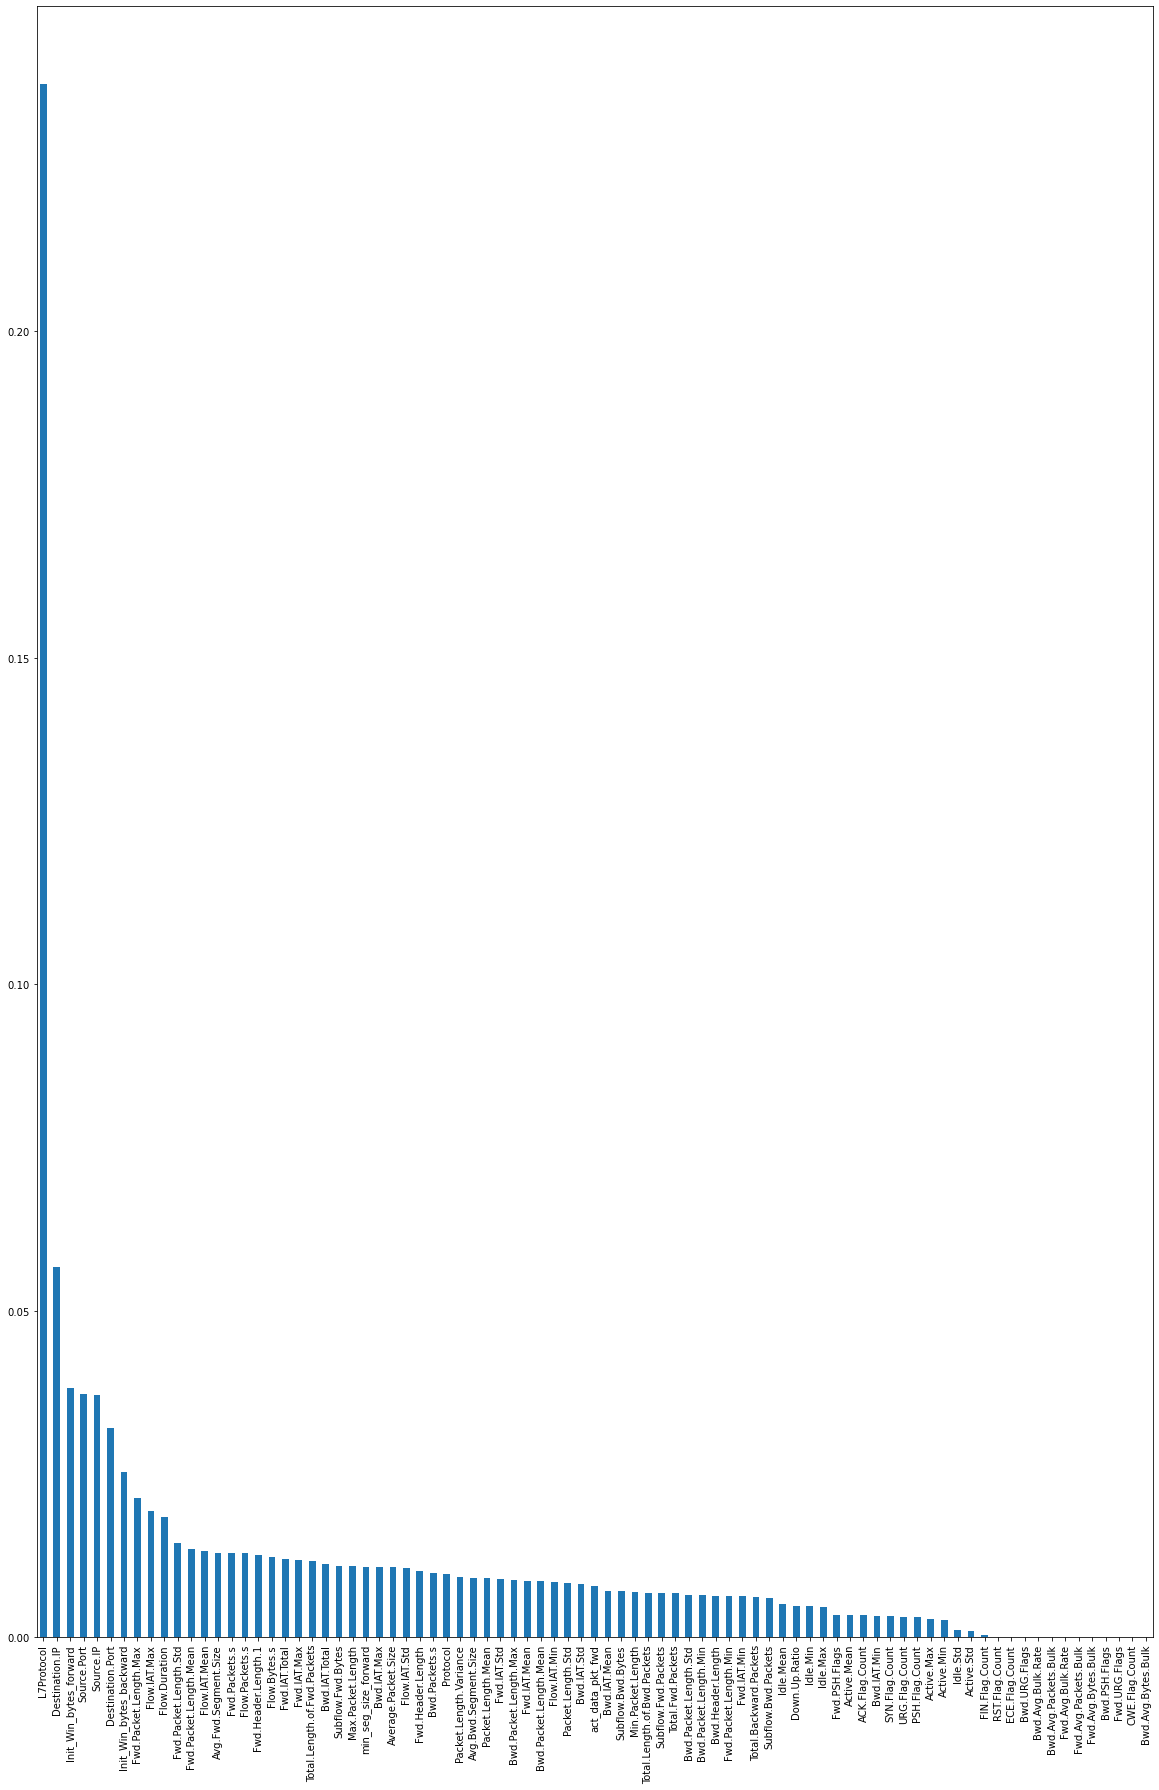

In [10]:
featureimpt1 = pd.Series(model.feature_importances_, index=x.columns)
featureimpt1.nlargest(83).plot(kind='bar',figsize=(20,30))

In [11]:
features_tobe_deleted=featureimpt.tail(28)

In [12]:
features_tobe_deleted=features_tobe_deleted.index
features_tobe_deleted

Index(['Idle.Mean', 'Down.Up.Ratio', 'Idle.Min', 'Idle.Max', 'Fwd.PSH.Flags',
       'Active.Mean', 'ACK.Flag.Count', 'Bwd.IAT.Min', 'SYN.Flag.Count',
       'URG.Flag.Count', 'PSH.Flag.Count', 'Active.Max', 'Active.Min',
       'Idle.Std', 'Active.Std', 'FIN.Flag.Count', 'RST.Flag.Count',
       'ECE.Flag.Count', 'Bwd.URG.Flags', 'Bwd.Avg.Bulk.Rate',
       'Bwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate', 'Fwd.Avg.Packets.Bulk',
       'Fwd.Avg.Bytes.Bulk', 'Bwd.PSH.Flags', 'Fwd.URG.Flags',
       'CWE.Flag.Count', 'Bwd.Avg.Bytes.Bulk'],
      dtype='object')

In [13]:
features_tobe_deleted=list(features_tobe_deleted)
features_tobe_deleted

['Idle.Mean',
 'Down.Up.Ratio',
 'Idle.Min',
 'Idle.Max',
 'Fwd.PSH.Flags',
 'Active.Mean',
 'ACK.Flag.Count',
 'Bwd.IAT.Min',
 'SYN.Flag.Count',
 'URG.Flag.Count',
 'PSH.Flag.Count',
 'Active.Max',
 'Active.Min',
 'Idle.Std',
 'Active.Std',
 'FIN.Flag.Count',
 'RST.Flag.Count',
 'ECE.Flag.Count',
 'Bwd.URG.Flags',
 'Bwd.Avg.Bulk.Rate',
 'Bwd.Avg.Packets.Bulk',
 'Fwd.Avg.Bulk.Rate',
 'Fwd.Avg.Packets.Bulk',
 'Fwd.Avg.Bytes.Bulk',
 'Bwd.PSH.Flags',
 'Fwd.URG.Flags',
 'CWE.Flag.Count',
 'Bwd.Avg.Bytes.Bulk']

In [14]:
x = x.drop(features_tobe_deleted, axis=1)

In [15]:
x

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,L7Protocol
0,3.232259e+09,3821.0,180881160.0,3128.0,6.0,341.0,1.0,1.0,6.0,6.0,...,20.0,1.0,6.0,1.0,6.0,64594.0,17856.0,0.0,20.0,178.0
1,3.232259e+09,4836.0,180881160.0,3128.0,6.0,341.0,1.0,1.0,6.0,6.0,...,20.0,1.0,6.0,1.0,6.0,64715.0,17688.0,0.0,20.0,178.0
2,3.232259e+09,3773.0,180881160.0,3128.0,6.0,327.0,1.0,1.0,6.0,6.0,...,20.0,1.0,6.0,1.0,6.0,64884.0,18760.0,0.0,20.0,178.0
3,3.232259e+09,1523.0,180881159.0,3128.0,6.0,313.0,1.0,1.0,6.0,6.0,...,20.0,1.0,6.0,1.0,6.0,65535.0,14600.0,0.0,20.0,178.0
4,3.232248e+09,3053.0,180881159.0,3128.0,6.0,766.0,1.0,2.0,6.0,12.0,...,20.0,1.0,6.0,2.0,12.0,65059.0,17688.0,0.0,20.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420497,3.232238e+09,57497.0,180881159.0,3128.0,6.0,291.0,1.0,1.0,6.0,6.0,...,20.0,1.0,6.0,1.0,6.0,64.0,557.0,0.0,20.0,124.0
420498,3.232292e+09,55316.0,180881159.0,3128.0,6.0,393.0,1.0,3.0,6.0,18.0,...,20.0,1.0,6.0,3.0,18.0,255.0,591.0,0.0,20.0,124.0
420499,3.232238e+09,51492.0,180881160.0,3128.0,6.0,12326.0,1.0,1.0,6.0,6.0,...,20.0,1.0,6.0,1.0,6.0,237.0,758.0,0.0,20.0,124.0
420500,3.232246e+09,51496.0,180881157.0,3128.0,6.0,100.0,1.0,1.0,6.0,0.0,...,20.0,1.0,6.0,1.0,0.0,61.0,280.0,0.0,20.0,124.0


In [16]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [17]:
x=pd.DataFrame(x,columns=data.columns[0:55])
x

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count
0,0.945448,-1.738083,-0.659034,-0.166763,-0.143452,-0.519110,-0.098693,-0.098722,-0.05275,-0.034630,...,-0.096313,-0.098693,-0.05275,-0.098722,-0.034630,2.740615,3.482267,-0.094574,-0.788081,0.800458
1,0.945448,-1.689242,-0.659034,-0.166763,-0.143452,-0.519110,-0.098693,-0.098722,-0.05275,-0.034630,...,-0.096313,-0.098693,-0.05275,-0.098722,-0.034630,2.747076,3.446777,-0.094574,-0.788081,0.800458
2,0.945448,-1.740392,-0.659034,-0.166763,-0.143452,-0.519111,-0.098693,-0.098722,-0.05275,-0.034630,...,-0.096313,-0.098693,-0.05275,-0.098722,-0.034630,2.756100,3.673236,-0.094574,-0.788081,0.800458
3,0.945448,-1.848659,-0.659034,-0.166763,-0.143452,-0.519111,-0.098693,-0.098722,-0.05275,-0.034630,...,-0.096313,-0.098693,-0.05275,-0.098722,-0.034630,2.790859,2.794439,-0.094574,-0.788081,0.800458
4,0.945441,-1.775038,-0.659034,-0.166763,-0.143452,-0.519098,-0.098693,-0.097690,-0.05275,-0.034626,...,-0.096313,-0.098693,-0.05275,-0.097690,-0.034626,2.765444,3.446777,-0.094574,-0.788081,0.800458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420497,0.945435,0.844724,-0.659034,-0.166763,-0.143452,-0.519112,-0.098693,-0.098722,-0.05275,-0.034630,...,-0.096313,-0.098693,-0.05275,-0.098722,-0.034630,-0.704895,-0.172134,-0.094574,-0.788081,-0.132293
420498,0.945470,0.739778,-0.659034,-0.166763,-0.143452,-0.519109,-0.098693,-0.096657,-0.05275,-0.034621,...,-0.096313,-0.098693,-0.05275,-0.096657,-0.034621,-0.694696,-0.164952,-0.094574,-0.788081,-0.132293
420499,0.945435,0.555773,-0.659034,-0.166763,-0.143452,-0.518757,-0.098693,-0.098722,-0.05275,-0.034630,...,-0.096313,-0.098693,-0.05275,-0.098722,-0.034630,-0.695657,-0.129673,-0.094574,-0.788081,-0.132293
420500,0.945440,0.555965,-0.659034,-0.166763,-0.143452,-0.519117,-0.098693,-0.098722,-0.05275,-0.034634,...,-0.096313,-0.098693,-0.05275,-0.098722,-0.034634,-0.705055,-0.230650,-0.094574,-0.788081,-0.132293


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 42)

# KNN

In [19]:
knn_clf=KNeighborsClassifier()

In [20]:
knn=KNeighborsClassifier(n_neighbors = 3, metric='manhattan', weights='distance')

In [21]:
%%time
knn.fit(X_train,y_train)

Wall time: 1min 14s


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [22]:
%%time
knn.score(X_test, y_test)

Wall time: 9min 3s


0.9480939509001117

In [23]:
%%time
y_pred = knn.predict(X_test)

Wall time: 9min 21s


In [24]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

           AMAZON       0.92      0.81      0.86      2958
            APPLE       0.94      0.89      0.91      2977
     APPLE_ICLOUD       0.93      0.98      0.95      2950
     APPLE_ITUNES       0.93      0.96      0.95      3062
    CITRIX_ONLINE       1.00      1.00      1.00        11
       CLOUDFLARE       0.98      0.97      0.98      3046
    CONTENT_FLASH       1.00      1.00      1.00      2950
           DEEZER       1.00      0.33      0.50        18
              DNS       1.00      0.99      1.00      2990
          DROPBOX       0.92      0.89      0.91      3028
         EASYTAXI       0.96      0.98      0.97      3083
             EBAY       0.93      0.96      0.95      3025
          EDONKEY       0.88      0.56      0.68        27
         FACEBOOK       0.95      0.95      0.95      2932
      FTP_CONTROL       1.00      1.00      1.00         9
         FTP_DATA       0.97      0.99      0.98      3

In [25]:
print(confusion_matrix(y_test, y_pred))

[[2391   15    3 ...   17    1    0]
 [   7 2651   99 ...    1    1    0]
 [   0   28 2884 ...    1    0    1]
 ...
 [   1    2    0 ... 3053    1    1]
 [   6    3    1 ...    2 2638    0]
 [   0    0    0 ...    0    0 2881]]


In [26]:
count1=0
for i in range(len(y_pred)):

    if y_pred[i]==y_test.values[i]:
        count1=count1+1
print("Testing accuracy:",(count1/(len(y_test.values))*100))

Testing accuracy: 94.80939509001118


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
gs_dt = DecisionTreeClassifier(random_state=42)
params = { 'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10,11,12,13,14,15,16,17] }
gs_dt = GridSearchCV(gs_dt, params, cv = 10, n_jobs = -1)

In [ ]:
gs_dt=gs_dt.fit(X_train,y_train)

In [ ]:
gs_dt.best_params_

In [28]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',random_state=42)

In [29]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [30]:
dt.score(X_test,y_test)

1.0

In [31]:
%%time
y_pred_dt = dt.predict(X_test)

Wall time: 161 ms


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier(max_depth=40, n_estimators=50, criterion='entropy')

In [34]:
%%time
rf.fit(X_train, y_train)

Wall time: 11min 13s


RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=50)

In [35]:
%%time
rf.score(X_test, y_test)

Wall time: 8.81 s


0.9904083201877115

In [36]:
%%time
y_pred_rf = rf.predict(X_test)

Wall time: 8.42 s


In [37]:
print(classification_report(y_test, y_pred_rf))

C:\Users\chara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

           AMAZON       0.97      0.97      0.97      2958
            APPLE       0.99      0.99      0.99      2977
     APPLE_ICLOUD       1.00      1.00      1.00      2950
     APPLE_ITUNES       1.00      1.00      1.00      3062
    CITRIX_ONLINE       1.00      1.00      1.00        11
       CLOUDFLARE       1.00      1.00      1.00      3046
    CONTENT_FLASH       1.00      1.00      1.00      2950
           DEEZER       1.00      0.44      0.62        18
              DNS       1.00      1.00      1.00      2990
          DROPBOX       0.99      0.95      0.97      3028
         EASYTAXI       0.99      1.00      1.00      3083
             EBAY       0.99      0.99      0.99      3025
          EDONKEY       1.00      0.78      0.88        27
         FACEBOOK       0.98      0.98      0.98      2932
      FTP_CONTROL       1.00      1.00      1.00         9
         FTP_DATA       0.99      1.00      1.00      3

In [38]:
print(confusion_matrix(y_test, y_pred_rf))

[[2882    0    0 ...    4    0    0]
 [   0 2949    1 ...    2    0    0]
 [   0    1 2945 ...    0    0    0]
 ...
 [   1    0    0 ... 3075    0    0]
 [   0    1    0 ...    0 2874    2]
 [   0    0    0 ...    0    0 3042]]
